In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [79]:

# ---------------------------------
# Code  Description
# ---------------------------------
# e	The value has been edited or estimated by USGS personnel.
# <	The Value is known to be less than reported value.
# >	The value is known to be greater than reported value.
# R	Records for these data have been revised.
# A	Approved for publication -- Processing and review completed.
# P	Provisional data subject to revision.

In [80]:
# file_name = 'Wall Steet Gage 2008 - 2015'
file_name = 'Huron R Near New Hudson 2005 - 2014'
# file_name = 'Hamburg Rd Gage 2008 - 2015'

# time_period = 'august'
time_period = 'spring'

var = 'Mean_CFS'

start_year = 2005
end_year = 2014

# x = 2005
# y = 2014

In [81]:
def CCDF_exceedance_flow(file_name, time_period, var, start_year, end_year):
    
    df = pd.read_csv(file_name + ".csv")

    df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    time_period_data = df

    years = []
    for year in range(start_year, end_year + 1):
        years.append(str(year))

    if (time_period == 'august'):
        time_period_data = df[df["Month"] == '08'].copy()
    
    # map dataframes
    concat_df = []
    for year in years:
        start_date = year + "-04-15"
        end_date = year + "-06-30"
        concat_df.append(df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)])
    
    # concat dataframes
    time_period_data = pd.concat(concat_df, ignore_index=True)

    sorted_data = time_period_data.sort_values(var, ascending=False)

    time_period_data['ranked_column_m'] = sorted_data[var].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())
    print("mean values: ", time_period_data[var].head())
    print("????", time_period_data[var].rank(ascending=False))

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [82]:
# debugging
df = CCDF_exceedance_flow(file_name, time_period, var, start_year, end_year)

ranked column m: 0    754.0
1    719.0
2    692.0
3    753.0
4    756.0
Name: ranked_column_m, dtype: float64
mean values:  0    45.9
1    53.7
2    60.5
3    46.7
4    45.1
Name: Mean_CFS, dtype: float64
???? 0      754.0
1      719.0
2      691.5
3      753.0
4      756.5
       ...  
765    329.5
766    364.5
767    402.0
768    456.5
769    485.0
Name: Mean_CFS, Length: 770, dtype: float64
0      97.795071
1      93.255512
2      89.753567
3      97.665370
4      98.054475
         ...    
765    43.060960
766    47.081712
767    52.269780
768    59.403372
769    63.035019
Name: P_Value, Length: 770, dtype: float64


In [83]:
#Plotting CCDF
def CCDF_plot(file_name, x, y):

    df = pd.read_csv(file_name + ".csv")

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df[x], df[y], marker='o', linestyle='-')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

    return plt.show()

In [84]:
#CCDF_plot(Aug_data, 'P_Value', 'Mean_CFS')

In [85]:
def CCDF_plot_P(df, x, y, P):
    df_sorted = df.sort_values(by='P_Value')
    # x = 'P_Value'
    # y = 'Mean_CFS'

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')


    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter
    plt.title('CCDF of ' + file_name + " " + time_period + " with " + str(P) + " exceedance probability")
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    if var == 'Mean_CFS':
        plt.ylabel('Mean Daily Flow (cfs)')
    if var == 'GageHeight_FT':
        plt.ylabel('ELevation/Gage Height (feet)')
    plt.grid(True)

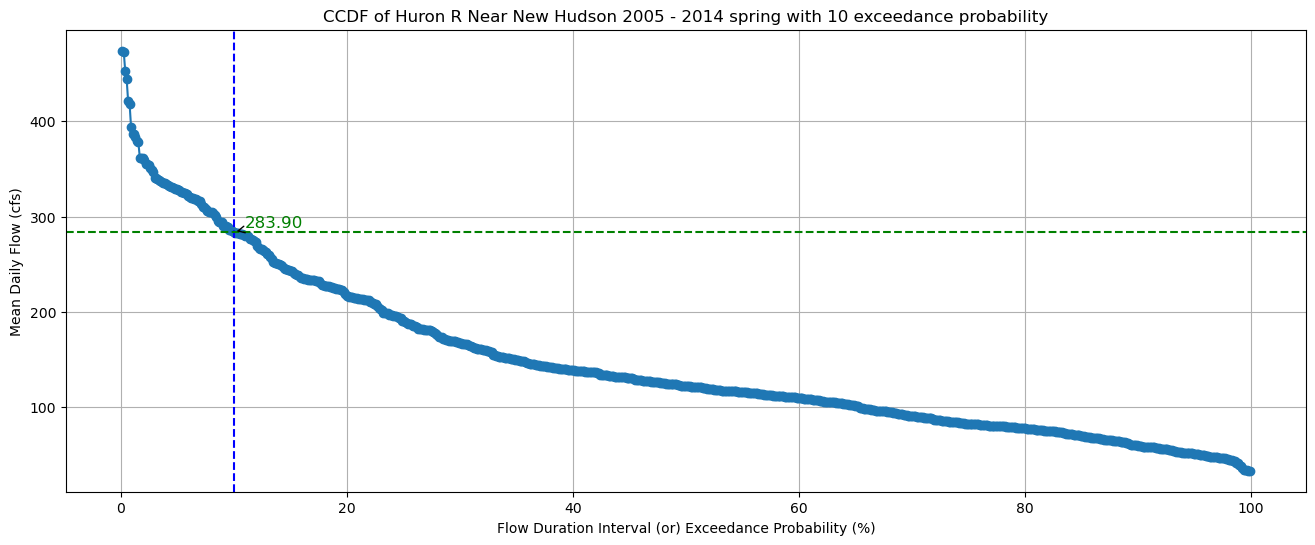

In [86]:
CCDF_plot_P(df, x='P_Value', y='Mean_CFS', P=10)